# 線形計画法を利用した効率的なコマ組の構築

## 線形計画法の導入(pulpの使い方)
```Python
# ライブラリのインポート
import pulp

# 線形計画問題の定義
problem = pulp.LpProblem('ProbremName', pulp.LpMaximize)
# 目的変数を最大化したい場合は、pulp.Maximize, 最小化したい場合は、pulp.Minimizeを利用する。

# 変数の定義
NewValue = pulp.LpVariable("NewValue",最小値, 最大値, 形式)
# 形式は、整数値の場合はIntegerを指定する(他にはfloat型連続値'Continuous'、2値変数'Binary'が指定できる)
```

# 線形問題の定義

1. 教務スタッフの情報を定義
    1. 教務スタッフのyyyy年mm月dd日のnコマ目の入室可否のデータを変数として定義
        ```Python
        teachername_PossTime_yyyymmddn = pulp.LpVariable("teachername_PossTime_yyyymmddn",0,1,"Integer")
        ```
    2. 教務スタッフの科目コードabcdeの授業実施可否についてのデータを定義
        ```Python
        teachername_PossSubject_abcde = pulp.LpVariable("teachername_PossSubject_abcde",0,1,"Integer")
        ```
2. 環境因子の設定
    1. 教室の利用可能ブース数についての定義
        ```Python
        room_n_poss_yyyymmddn = pulp.LpVariable("room_n_poss_yyyymmddn",0,5,"Integer")
        ```
    2. 最大可能授業講師数
        該当時間における最大講師数の定義を行う。例えば、教室のブースが5つ空いている場合は、最大可能授業講師数は5になる。
        ```Python
        booth_num_yyyymmddn = pulp.LpVariable("booth_num_yyyymmddn",0,5,"Integer")
        ```
    3. 講習期間の定義   
        * 開始日: 2024/2/21
        * 終了日: 2024/3/31
        ```Python
        day_open_yyyymmddn = pulp.LpVariable("day_open_yyyymmddn",0,1,"Integer")
        ```
3. 生徒情報の定義
    生徒の来塾可能日程や履修科目やコマ数等について定義する。
    1. 来塾可能日程についての定義
    2. 履修科目の定義
    3. 残りコマ数の定義
    4. 主要な科目担当者の定義
    5. 生徒の情報(学年や性別等,NG講師等)の定義
    6. 備考
    

In [2]:
import pulp

In [4]:
EikoPproblem = pulp.LpProblem('EikoClass', pulp.LpMaximize)

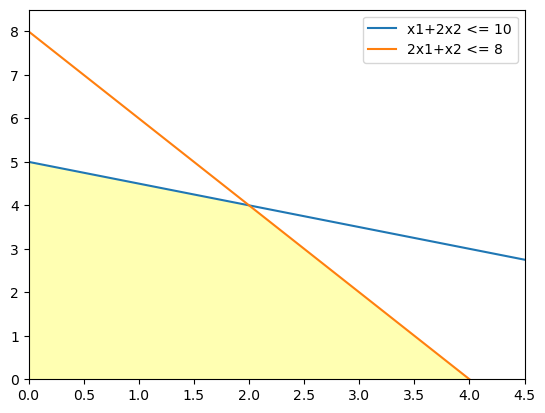

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 100)

y1 = 5 - 0.5*x
y2 =  8 - 2*x
y3 = np.zeros_like(x)

y4 = np.minimum(y1, y2)

plt.figure()
plt.plot(x, y1, label="x1+2x2 <= 10")
plt.plot(x, y2, label="2x1+x2 <= 8")
plt.fill_between(x, y3, y4, where=y4>y3, facecolor='yellow', alpha=0.3)
plt.ylim(0, 8.5)
plt.xlim(0, 4.5)
plt.legend(loc=0)

plt.show()


In [10]:
# 生徒、講師、時間帯をリストとして定義
students = ['S1', 'S2', 'S3', 'S4', 'S5']
teachers = ['T1', 'T2', 'T3']
time_slots = ['9-10', '10-11', '11-12']

# 辞書形式で変数を定義
variables = {
    (student, teacher, time_slot): pulp.LpVariable(
        f"x_{student}_{teacher}_{time_slot}", cat="Binary"
    )
    for student in students
    for teacher in teachers
    for time_slot in time_slots
}

# 結果を確認
for key, var in list(variables.items())[:5]:  # 最初の5つを確認
    print(f"{key}: {var}")

('S1', 'T1', '9-10'): x_S1_T1_9_10
('S1', 'T1', '10-11'): x_S1_T1_10_11
('S1', 'T1', '11-12'): x_S1_T1_11_12
('S1', 'T2', '9-10'): x_S1_T2_9_10
('S1', 'T2', '10-11'): x_S1_T2_10_11
